In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import re

Importations des bibliothèques nécessaires & Affichage des graphes dans le document

In [2]:
 data_url = "http://dramacode.github.io/markdown/moliere_avare.txt"

Sauvegarde l'URL

In [3]:
data_file = "molire_avare.txt"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Téléchargement du fichier si non-existant

In [4]:
with open(data_file) as f:
    lines_avare = f.readlines()
f.close()

Ouverture, stockage puis fermeture des lignes du texte

In [5]:
actes_index = []
 
for line in lines_avare:
    if "## Acte" in line:
        actes_index.append(lines_avare.index(line))

nb_actes = len(actes_index)
actes_list = [None]*nb_actes

for i in range(0,nb_actes) :
    if i < (nb_actes-1) :
        actes_list[i] = lines_avare[actes_index[i]:(actes_index[i+1]-1)]
    else :
        actes_list[i] = lines_avare[actes_index[i]:]

Découpage du texte en Actes

In [18]:
scene_index = [[] for _ in range(nb_actes)]

for cc in range(0,nb_actes) :
    for lines in actes_list[cc]:
        if "### Scène" in lines:
            scene_index[cc].append(actes_list[cc].index(lines))

scene_list = [[] for _ in range(nb_actes)]

for dd in range(0,nb_actes) :
    nb_scenes = len(scene_index[dd])
    scene_list[dd] = [[] for _ in range(nb_scenes)]
    for ee in range(0,nb_scenes) :
        if ee < (nb_scenes-1) :
            scene_list[dd][ee] = actes_list[dd][scene_index[dd][ee]:(scene_index[dd][ee+1]-1)]
        else :
            scene_list[dd][ee] = actes_list[dd][scene_index[dd][ee]:]

Découpage des Actes en Scènes

In [34]:
acteurs_index = [[] for _ in range(nb_actes)]

acteurs_noms_temp = []

for j in range(0,nb_actes) :
    acteurs_index[j] = [[] for _ in range(len(scene_list[j]))]
    for h in range(0,len(scene_list[j])) :
        acteurs_index[j][h] = [(ligne,acteur) for ligne, acteur in enumerate(scene_list[j][h]) if "    " in acteur]
        for k in range(0,len(acteurs_index[j][h])) :
            if not acteurs_index[j][h][k][1] in acteurs_noms_temp :
                acteurs_noms_temp.append((acteurs_index[j][h][k][1]))
                        
acteurs_noms = []
for entrance in acteurs_noms_temp :
    stripped = re.sub("[$@*&?].*[$@*&?]", ",", entrance)
    stripped = stripped.replace('\n','')
    stripped = stripped.replace(', ','')
    stripped = stripped.replace(' ,','')
    stripped = stripped.replace(',','')
    stripped = stripped.replace('.','')
    stripped = stripped.replace('    ','')
    if not stripped in acteurs_noms :
        acteurs_noms.append(stripped)


Extraction de l'index de parole de chaque Personnage pour chaque Scène de chaque Acte et du nom de chaque Personnage en éliminant les doublons liés aux didascalies

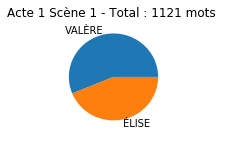

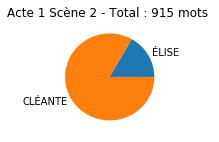

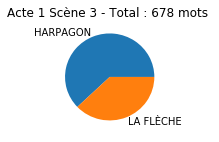

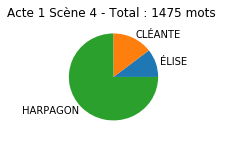

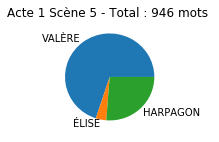

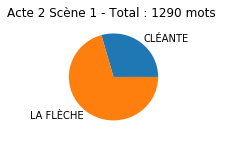

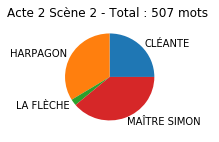

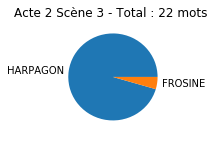

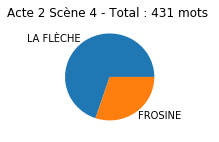

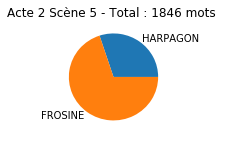

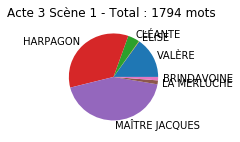

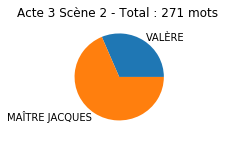

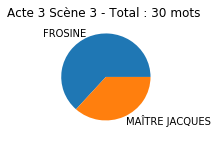

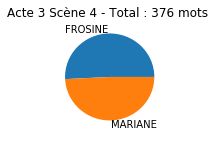

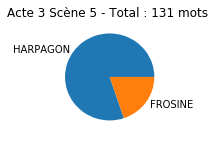

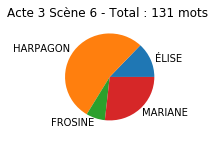

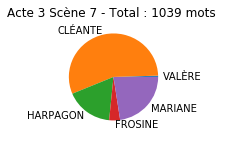

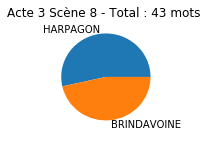

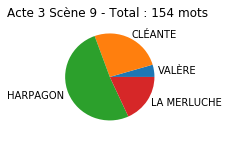

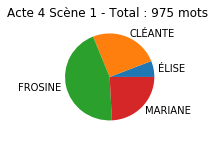

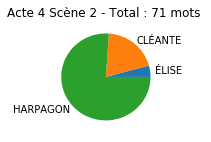

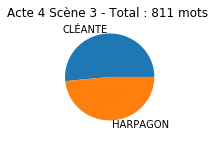

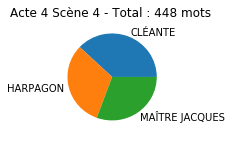

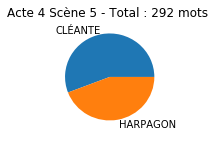

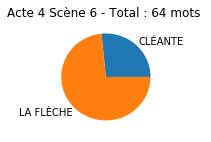

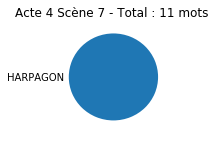

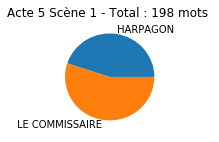

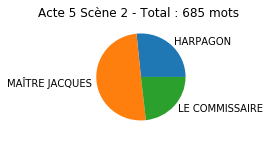

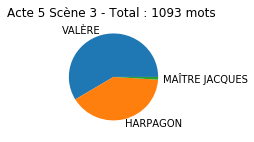

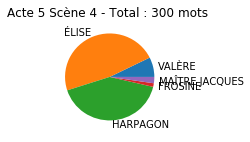

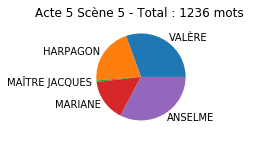

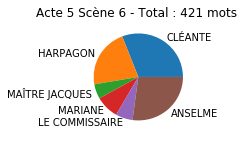

In [323]:


scene_decompte = [[] for _ in range(nb_actes)]

for m in range(0,nb_actes) :
    scene_decompte[m] = [[] for _ in range(len(scene_list[m]))]
    
    for n in range(0,len(scene_list[m])) :
        scene_decompte[m][n] = [0 for _ in range(len(acteurs_noms))]
        
        for p in range(0,len(acteurs_noms)) :
            for gg in range(0,len(acteurs_index[m][n])) :
                
                if acteurs_noms[p] in acteurs_index[m][n][gg][1] :
                    decompte = scene_list[m][n][(acteurs_index[m][n][gg][0]+1)]
                    decompte = decompte.replace('\n',' ')
                    decompte = decompte.replace(',',' ')
                    decompte = decompte.replace('.',' ')
                    decompte = decompte.replace('?',' ')
                    decompte = decompte.replace(':',' ')
                    decompte = decompte.replace(';',' ')
                    decompte = decompte.replace('!',' ')
                    decompte = decompte.replace("'",' ')
                    decompte = decompte.replace('-',' ')
                    decompte = decompte.replace('  ',' ')
                    decompte = decompte.replace('   ',' ')
                    decompte = decompte.replace('    ',' ')
                    decompte = decompte.split()
                    scene_decompte[m][n][p] = scene_decompte[m][n][p] + len(decompte)
                    
for each_acte in range(nb_actes) :
    scene_temp = scene_decompte[each_acte][:]
    for each_scene in range(len(scene_decompte[each_acte])) :
        parole_temp = []
        personnage_temp = []
        for parole in range(len(scene_temp[each_scene])) :
            if not scene_temp[each_scene][parole] == 0 :
                parole_temp.append(scene_temp[each_scene][parole])
                personnage_temp.append(acteurs_noms[parole])
        plt.figure(figsize = (2, 2))
        title = "Acte {} Scène {} - Total : {} mots ".format(each_acte+1, each_scene+1,sum(scene_temp[each_scene]))
        plt.title(title)
        plt.pie(parole_temp, labels = personnage_temp)
        

Pour chaque acte, chaque réplique de personnage est associée à son personnage puis est décortiquée avant qu'un décompte du nombre de mots ait lieu. Puis le décompte est stocké dans un tableau avant d'en faire une représentation graphique par acte

In [271]:
for aa in range(nb_actes) :
    print("Dans l'Acte", (aa+1),',')
    for bb in range(len(scene_list[aa])) :
        print('Scène', (bb+1), ',')
        for hh in range(len(acteurs_noms)) :
            if scene_decompte[aa][bb][hh] == 0 :
                print('- Le personnage prénommé',acteurs_noms[hh],'ne parle pas')
            else :
                print('- Le personnage prénommé',acteurs_noms[hh],'prononce', scene_decompte[aa][bb][hh], 'mots')    

Dans l'Acte 1 ,
Scène 1 ,
- Le personnage prénommé VALÈRE prononce 630 mots
- Le personnage prénommé ÉLISE prononce 491 mots
- Le personnage prénommé CLÉANTE ne parle pas
- Le personnage prénommé HARPAGON ne parle pas
- Le personnage prénommé LA FLÈCHE ne parle pas
- Le personnage prénommé MAÎTRE SIMON ne parle pas
- Le personnage prénommé FROSINE ne parle pas
- Le personnage prénommé MAÎTRE JACQUES ne parle pas
- Le personnage prénommé LA MERLUCHE ne parle pas
- Le personnage prénommé BRINDAVOINE ne parle pas
- Le personnage prénommé MARIANE ne parle pas
- Le personnage prénommé LE COMMISSAIRE ne parle pas
- Le personnage prénommé ANSELME ne parle pas
Scène 2 ,
- Le personnage prénommé VALÈRE ne parle pas
- Le personnage prénommé ÉLISE prononce 154 mots
- Le personnage prénommé CLÉANTE prononce 761 mots
- Le personnage prénommé HARPAGON ne parle pas
- Le personnage prénommé LA FLÈCHE ne parle pas
- Le personnage prénommé MAÎTRE SIMON ne parle pas
- Le personnage prénommé FROSINE ne pa

OPTION - Ce n'est pas demandé dans le sujet 5 - C'est ici que sont affichés les décomptes de mots par scène pour chaque personnage au format texte